# Imports

In [1]:
from src.sql_helpers import query_df
import numpy as np
import matplotlib.pyplot as plt

Connection to SQL server successful!


/home/markus/Desktop/Data Scientist/3. SQL/2. Examinerande_Uppgift/src/sql_helpers.py:19: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  with engine.connect():


# Task 1 - Amount of products per category
### Place all unique Categories in a list

In [2]:
# Production.ProductCategory
cat_query = """
SELECT ProductCategoryID
FROM Production.ProductCategory
"""

cat_df = query_df(cat_query)

productCategoryIDs = cat_df['ProductCategoryID'].unique()
productCategoryIDs.sort()
print(f"Category ID's: {productCategoryIDs}")

Category ID's: [1 2 3 4]


### Place all unique Subcategories in a list

In [3]:
# Production.ProductSubcategory
subcat_query = """
SELECT ProductSubcategoryID, ProductCategoryID
FROM Production.ProductSubcategory
"""
subcat_df = query_df(subcat_query)
productSubcategoryIDs = subcat_df['ProductSubcategoryID'].unique()
productSubcategoryIDs.sort()
print(f"Subcategory ID's: {productSubcategoryIDs}")

Subcategory ID's: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37]


### Place all products in a DataFrame

In [4]:
# Production.Product
product_query = """
SELECT ProductSubcategoryID
FROM Production.Product
"""

product_df = query_df(product_query)

### Check how many subcategories each category has

In [5]:
subcats_in_cat = {}

# Loops over all ProductCategoryID's and adds it as a key along with all ProductSubcategoryID's as a list for value that has that ProductCategoryID
for i in productCategoryIDs:
    temp_df = subcat_df.loc[subcat_df["ProductCategoryID"] == i]
    if i not in subcats_in_cat:
        subcats_in_cat[i] = [_ for _ in temp_df["ProductSubcategoryID"]]

print(subcats_in_cat)


{1: [1, 2, 3], 2: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 3: [18, 19, 20, 21, 22, 23, 24, 25], 4: [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]}


3
14
8
12


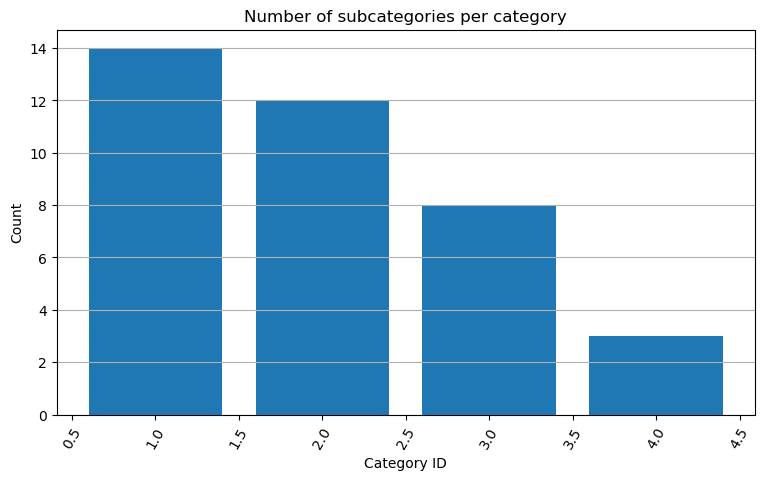

In [6]:
for v in subcats_in_cat.values():
    print(len(v))

fig, ax = plt.subplots(figsize=(9, 5))
x = list(subcats_in_cat.keys())
y = list(len(v) for v in subcats_in_cat.values())
y.sort(reverse=True)
ax.bar(x, y)
ax.set_title("Number of subcategories per category")
ax.set_xlabel("Category ID")
ax.set_ylabel("Count")
ax.grid(axis = "y")
plt.xticks(rotation=60)
plt.show()

### Check how many products each subcategory has

In [19]:
products_per_subcat = {}

for i in productSubcategoryIDs:
    products_per_subcat[f"{i}"] = len(product_df[product_df["ProductSubcategoryID"] == i])
products_per_subcat["Null"] = product_df["ProductSubcategoryID"].isna().sum()

sorted_orders = dict(sorted(products_per_subcat.items(), key=lambda item: item[1], reverse=True))

print(products_per_subcat)

{'1': 32, '2': 43, '3': 22, '4': 8, '5': 3, '6': 2, '7': 1, '8': 3, '9': 2, '10': 3, '11': 3, '12': 28, '13': 7, '14': 33, '15': 9, '16': 18, '17': 14, '18': 3, '19': 1, '20': 6, '21': 8, '22': 7, '23': 4, '24': 3, '25': 3, '26': 1, '27': 1, '28': 3, '29': 1, '30': 1, '31': 3, '32': 1, '33': 3, '34': 1, '35': 1, '36': 2, '37': 11, 'Null': 209}


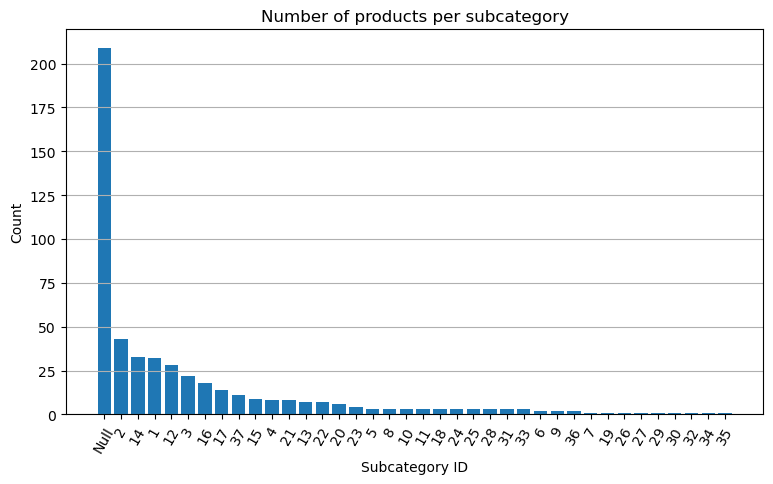

In [20]:
fig, ax = plt.subplots(figsize=(9, 5))
x = list(sorted_orders.keys())
y = list(sorted_orders.values())
ax.bar(x, y)
ax.set_title("Number of products per subcategory")
ax.set_xlabel("Subcategory ID")
ax.set_ylabel("Count")
ax.grid(axis = "y")
plt.xticks(rotation=60)
plt.show()

### Check how many products each category has

In [35]:
print(subcats_in_cat)
print(products_per_subcat)

products_per_cat = {}

for i in subcats_in_cat:
    print(subcats_in_cat[i])
    products_per_cat[i] = 0
    for j in subcats_in_cat[i]:
        pass
        #products_per_cat[i] += 1

#print(products_per_cat)

{1: [1, 2, 3], 2: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 3: [18, 19, 20, 21, 22, 23, 24, 25], 4: [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]}
{'1': 32, '2': 43, '3': 22, '4': 8, '5': 3, '6': 2, '7': 1, '8': 3, '9': 2, '10': 3, '11': 3, '12': 28, '13': 7, '14': 33, '15': 9, '16': 18, '17': 14, '18': 3, '19': 1, '20': 6, '21': 8, '22': 7, '23': 4, '24': 3, '25': 3, '26': 1, '27': 1, '28': 3, '29': 1, '30': 1, '31': 3, '32': 1, '33': 3, '34': 1, '35': 1, '36': 2, '37': 11, 'Null': 209}
[1, 2, 3]
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[18, 19, 20, 21, 22, 23, 24, 25]
[26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]


# Conclusion Task 1:
* Category 2 has the most subcategories
* Subcategory 2 has the most products